# Ensemble

- RANDOM FOREST
- BAGGING
- ADABOST
- GRADIENT BOOSTING (con versioni XGBOOST, LIGHTGBM, CATBOOST)

In [1]:
%matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from collections import defaultdict
from itertools import cycle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from yellowbrick import ROCAUC
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import tree

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from scikitplot.metrics import plot_roc

In [2]:
from sklearn.decomposition import PCA
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer

LOAD

In [4]:
#df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_SenzaOutlier.csv') 
df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_post_encoding.csv') 
df.shape

(87950, 24)

In [5]:
df = df.drop([ 'popularity','valence', 'energy'], axis = 1)  #'valence', 'energy',
df.head()

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,-0.186041,-0.588997,1.938632,0.659428,1.766613,-0.889812,2.141972,-1.417948,0.787971,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,nervous
1,2.550119,1.063136,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-0.080843,0.765656,-1.999208,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,bored
2,0.543118,1.355375,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.147003,1.326491,-1.946310,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,nervous
3,1.592682,0.633373,-1.010613,0.366106,-0.822027,1.836646,-0.443037,0.221461,1.442640,-1.916735,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,nervous
4,0.385608,1.126168,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-0.081281,1.442640,0.787971,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,nervous


In [6]:
from sklearn.preprocessing import LabelEncoder

# Inizializza il LabelEncoder
label_encoder = LabelEncoder()

# Codifica le etichette di emozione nel DataFrame
df['emotion'] = label_encoder.fit_transform(df['emotion'])
df

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,-0.186041,-0.588997,1.938632,0.659428,1.766613,-0.889812,2.141972,-1.417948,0.787971,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,5
1,2.550119,1.063136,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-0.080843,0.765656,-1.999208,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,1
2,0.543118,1.355375,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.147003,1.326491,-1.946310,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,5
3,1.592682,0.633373,-1.010613,0.366106,-0.822027,1.836646,-0.443037,0.221461,1.442640,-1.916735,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,5
4,0.385608,1.126168,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-0.081281,1.442640,0.787971,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87945,-0.061779,-0.564232,1.637100,0.608776,-0.940847,1.534564,1.111459,1.736284,0.934902,0.787971,...,-1.805076,0.718447,1.320089,1.250663,1,5,0,4,0.003343,3
87946,-0.110350,0.581802,0.936856,-1.645092,0.136492,-0.616040,-1.018318,-0.756126,0.878487,0.787971,...,0.134011,-0.458242,-0.067569,-0.300284,1,9,1,4,0.003343,5
87947,-0.235874,1.424137,0.749566,-0.122951,-0.736753,-0.605343,-0.200804,0.255855,1.216979,0.634326,...,-0.992088,-0.027072,1.929533,1.725765,1,11,0,4,0.003343,7
87948,-0.073532,0.507310,1.449257,-0.592442,0.139463,-0.616016,-2.392504,-0.483129,0.672737,0.787971,...,0.513040,-0.340721,-0.320723,-0.301306,0,0,1,4,0.003343,3


In [7]:

# Costruisci il mapping
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Stampa il mapping
print("Mapping delle emozioni:")
for emotion, code in mapping.items():
    print(f"{emotion}: {code}")

# Decodifica un esempio
decoded_code = 1  # Esempio di codice da decodificare
decoded_emotion = label_encoder.inverse_transform([decoded_code])[0]
print(f"\nDecodificato il codice {decoded_code}: {decoded_emotion}")


Mapping delle emozioni:
angry: 0
bored: 1
calm: 2
excited: 3
happy: 4
nervous: 5
peaceful: 6
pleased: 7
relaxed: 8
sad: 9
sleepy: 10

Decodificato il codice 1: bored


In [8]:
mapping

{'angry': 0,
 'bored': 1,
 'calm': 2,
 'excited': 3,
 'happy': 4,
 'nervous': 5,
 'peaceful': 6,
 'pleased': 7,
 'relaxed': 8,
 'sad': 9,
 'sleepy': 10}

In [9]:
df['emotion'].value_counts()

emotion
2     18414
3     13309
4     11751
0      9847
7      8842
1      7145
5      7077
9      5924
8      3136
10     2055
6       450
Name: count, dtype: int64

PARTITION

In [10]:
attributes = [col for col in df.columns if col != "emotion"]

X = df[attributes].values
y = np.array(df["emotion"])  # oppure y = df['emotion].values

X.shape, y.shape

((87950, 20), (87950,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Usando l'opzione stratify=y, garantisci che la suddivisione mantenga la stessa proporzione di classi tra set di addestramento e di test, utile quando hai un set di dati sbilanciato

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70360, 20), (17590, 20), (70360,), (17590,))

In [12]:
pd.Series(y_train).value_counts()
pd.Series(y_test).value_counts()

2     3683
3     2662
4     2350
0     1970
7     1768
1     1429
5     1415
9     1185
8      627
10     411
6       90
Name: count, dtype: int64

 # Random Forest
 

In [13]:
from sklearn.ensemble import RandomForestClassifier

Cosa vado a fare: <br>
- Hyper-parameter tuning su tutto l'x_test con la random search e vado ad allenare il modello con i parametri migliori, stampando il classification report;
- Vado a vedere la feature importance per questo modello e faccio un dataset con solo le k feature che vengono considerate più importanti;
- Con il dataset con le k feature più importanti vado a fare di nuovo hyper parameter tuning, e a vedere l'accuracy;
- Su uno dei due vado a fare il plot dell'accuracy al variare del numero di stimatori che vengono usati - sarebbe molto bello fare il plot con entrambi sovrapposti, facendo vedere l'accuracy allenando su tutto e l'accuracy allenando invece soltanto su quelle migliori

In [57]:
#5 minuti


param_list = {'n_estimators': [50, 100, 150, 200],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
              'max_depth': list(np.arange(2, 10)),
              'criterion':['gini','entropy','log_loss'],
            'max_features': ['sqrt', 'log2']
             }

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_list, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_params_


{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [53]:
random_search.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=5,
                       min_samples_split=20, n_estimators=50)

In [58]:
#alleno il modello con i migliori parametri
rfc1 = random_search.best_estimator_
rfc1.fit(X_train, y_train)

y_pred_rfc1 = rfc1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_rfc1))
print('F1-score %s' % f1_score(y_test, y_pred_rfc1, average='weighted'))
print(classification_report(y_test, y_pred_rfc1, target_names=mapping))

Accuracy 0.4467879476975554
F1-score 0.40251733079620294
              precision    recall  f1-score   support

       angry       0.59      0.52      0.55      1970
       bored       0.56      0.21      0.30      1429
        calm       0.36      0.79      0.50      3683
     excited       0.45      0.46      0.45      2662
       happy       0.45      0.47      0.46      2350
     nervous       0.52      0.11      0.18      1415
    peaceful       1.00      0.04      0.09        90
     pleased       0.53      0.10      0.16      1768
     relaxed       1.00      0.00      0.01       627
         sad       0.67      0.80      0.73      1185
      sleepy       0.72      0.03      0.06       411

    accuracy                           0.45     17590
   macro avg       0.62      0.32      0.32     17590
weighted avg       0.51      0.45      0.40     17590



In [59]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, rfc1.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_rfc1)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)


Accuratezza sul set di addestramento: 0.4699118817509949
Accuratezza sul set di test: 0.4467879476975554


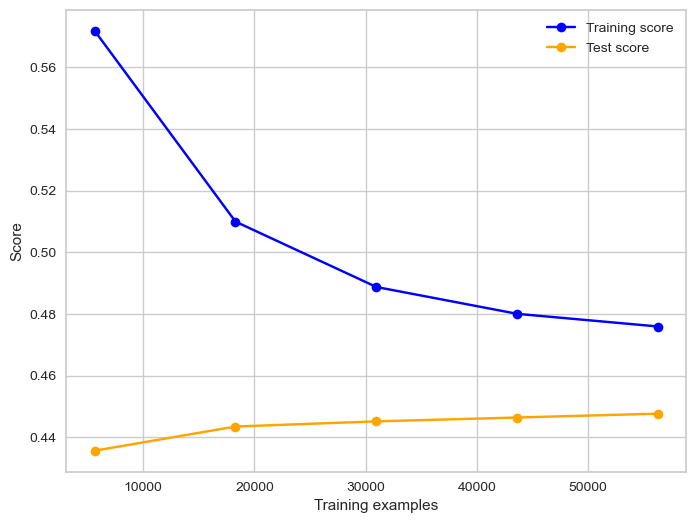

In [60]:
# Disegna le curve di apprendimento per valutare le prestazioni del modello al variare della dimensione 
# del set di addestramento e confronta le prestazioni sul set di addestramento e di test.



plt.figure(figsize=(8, 6))  # Modifica le dimensioni come desiderato (larghezza, altezza)
train_sizes, train_scores, test_scores = learning_curve(rfc1, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color = 'blue')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Test score', color= 'orange')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


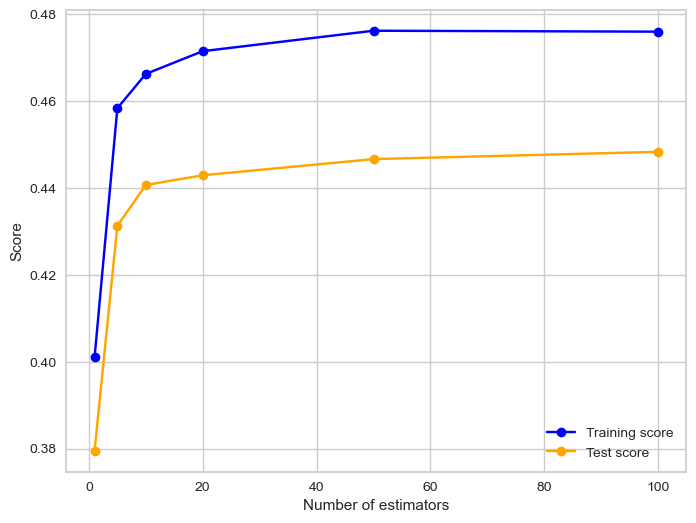

In [61]:


plt.figure(figsize=(8, 6))
param_range = [1, 5, 10, 20, 50, 100]  # Esempio di parametri da esplorare
train_scores, test_scores = validation_curve(rfc1, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, 'o-', label='Training score', color = 'blue')
plt.plot(param_range, test_scores_mean, 'o-', label='Test score', color = 'orange')
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

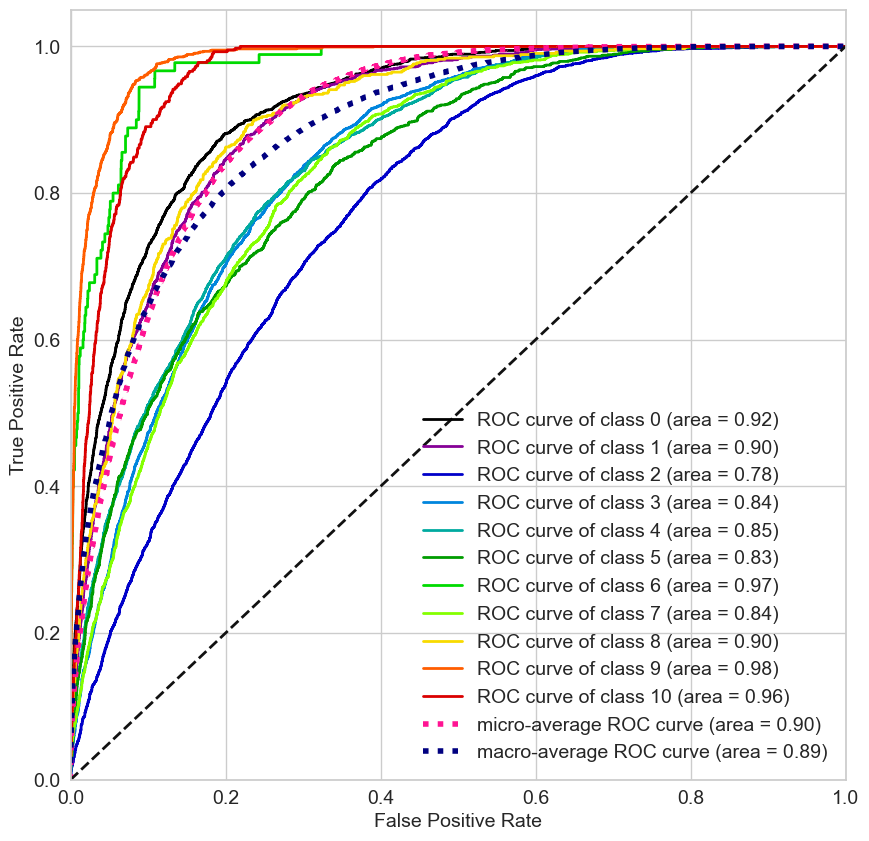

In [68]:
from scikitplot.metrics import plot_roc

y_score_rfc1 = rfc1.predict_proba(X_test)
plot_roc(y_test, y_score_rfc1, figsize=(10,8), title_fontsize=15, text_fontsize=14)
plt.title("")
plt.show()

array([[1016,    6,  199,  618,   89,   31,    0,    0,    0,   11,    0],
       [  11,  297,  921,    4,    2,   42,    0,    3,    0,  149,    0],
       [  60,   88, 2927,  169,  302,   48,    0,   40,    0,   47,    2],
       [ 399,    1,  444, 1224,  573,   10,    0,   11,    0,    0,    0],
       [  86,    0,  564,  529, 1106,    4,    0,   61,    0,    0,    0],
       [ 127,   42,  885,  135,   62,  154,    0,    2,    0,    8,    0],
       [   0,    0,   43,    0,    0,    0,    4,    1,    0,   40,    2],
       [   9,    4, 1238,   52,  289,    5,    0,  169,    0,    2,    0],
       [   4,    5,  550,    2,   10,    2,    0,   33,    2,   19,    0],
       [   3,   70,  162,    0,    0,    2,    0,    0,    0,  947,    1],
       [   0,   13,  187,    0,    0,    0,    0,    0,    0,  198,   13]],
      dtype=int64)

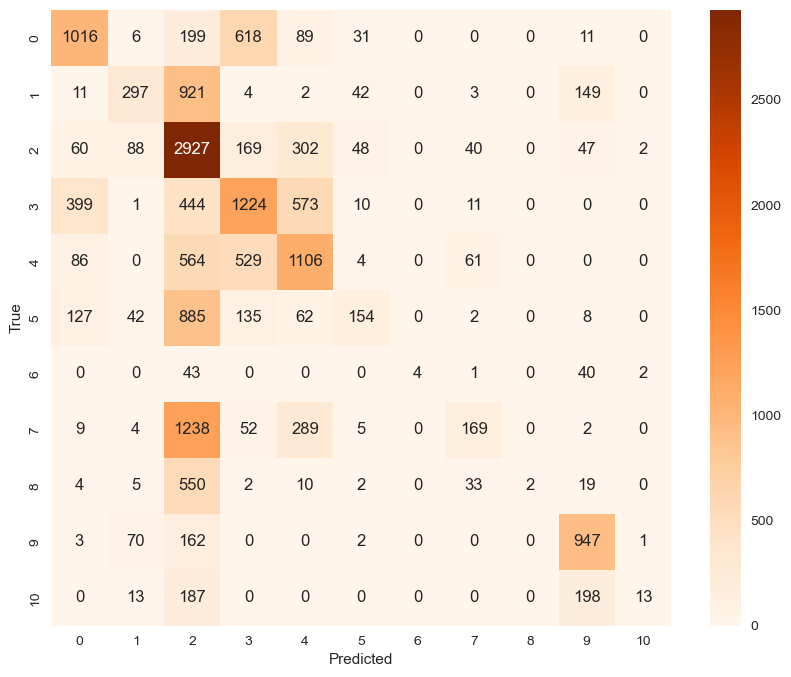

In [63]:
cm_rfc1 = confusion_matrix(y_test, y_pred_rfc1)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_rfc1, annot=True, fmt='d',cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('True')
cm_rfc1

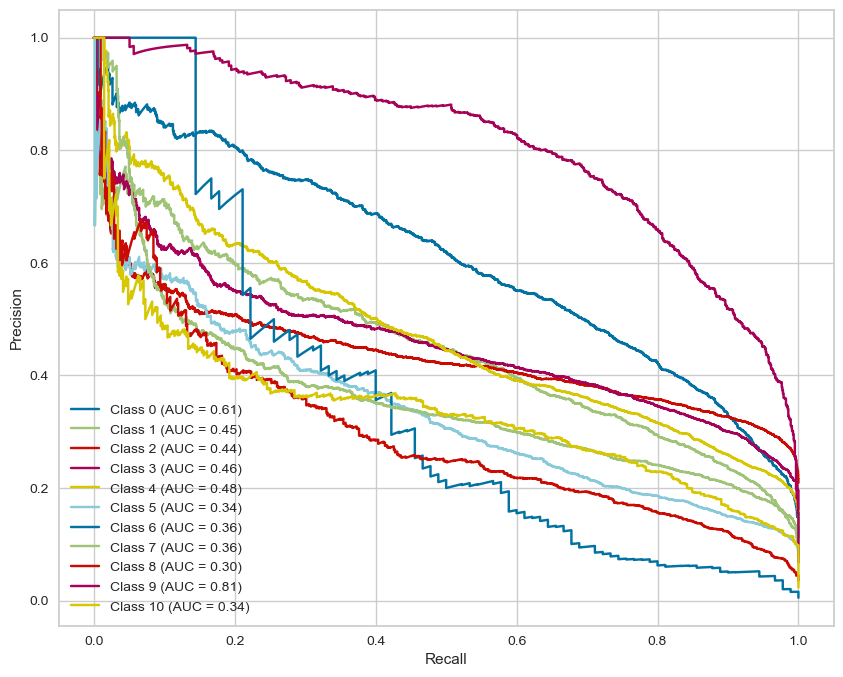

In [64]:
# Make predictions on test data
y_pred_proba = rfc1.predict_proba(X_test)  # Probability estimates of each class

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Compute precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()
auc_score = dict()

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend(loc='lower left')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [69]:
#Getting feature importance: 
import json
json.dumps(classification_report(y_test, y_pred_rfc1, output_dict=True))

'{"0": {"precision": 0.5924198250728863, "recall": 0.515736040609137, "f1-score": 0.5514246947082767, "support": 1970}, "1": {"precision": 0.564638783269962, "recall": 0.20783764870538837, "f1-score": 0.30383631713554987, "support": 1429}, "2": {"precision": 0.3604679802955665, "recall": 0.7947325549823513, "f1-score": 0.49597559942387526, "support": 3683}, "3": {"precision": 0.4478594950603732, "recall": 0.4598046581517656, "f1-score": 0.45375347544022243, "support": 2662}, "4": {"precision": 0.4545828195643239, "recall": 0.4706382978723404, "f1-score": 0.4624712523520803, "support": 2350}, "5": {"precision": 0.5167785234899329, "recall": 0.1088339222614841, "f1-score": 0.17980151780502043, "support": 1415}, "6": {"precision": 1.0, "recall": 0.044444444444444446, "f1-score": 0.0851063829787234, "support": 90}, "7": {"precision": 0.528125, "recall": 0.09558823529411764, "f1-score": 0.16187739463601533, "support": 1768}, "8": {"precision": 1.0, "recall": 0.003189792663476874, "f1-score"

In [70]:
json.loads(json.dumps(classification_report(y_test, y_pred_rfc1, output_dict=True)))

{'0': {'precision': 0.5924198250728863,
  'recall': 0.515736040609137,
  'f1-score': 0.5514246947082767,
  'support': 1970},
 '1': {'precision': 0.564638783269962,
  'recall': 0.20783764870538837,
  'f1-score': 0.30383631713554987,
  'support': 1429},
 '2': {'precision': 0.3604679802955665,
  'recall': 0.7947325549823513,
  'f1-score': 0.49597559942387526,
  'support': 3683},
 '3': {'precision': 0.4478594950603732,
  'recall': 0.4598046581517656,
  'f1-score': 0.45375347544022243,
  'support': 2662},
 '4': {'precision': 0.4545828195643239,
  'recall': 0.4706382978723404,
  'f1-score': 0.4624712523520803,
  'support': 2350},
 '5': {'precision': 0.5167785234899329,
  'recall': 0.1088339222614841,
  'f1-score': 0.17980151780502043,
  'support': 1415},
 '6': {'precision': 1.0,
  'recall': 0.044444444444444446,
  'f1-score': 0.0851063829787234,
  'support': 90},
 '7': {'precision': 0.528125,
  'recall': 0.09558823529411764,
  'f1-score': 0.16187739463601533,
  'support': 1768},
 '8': {'prec

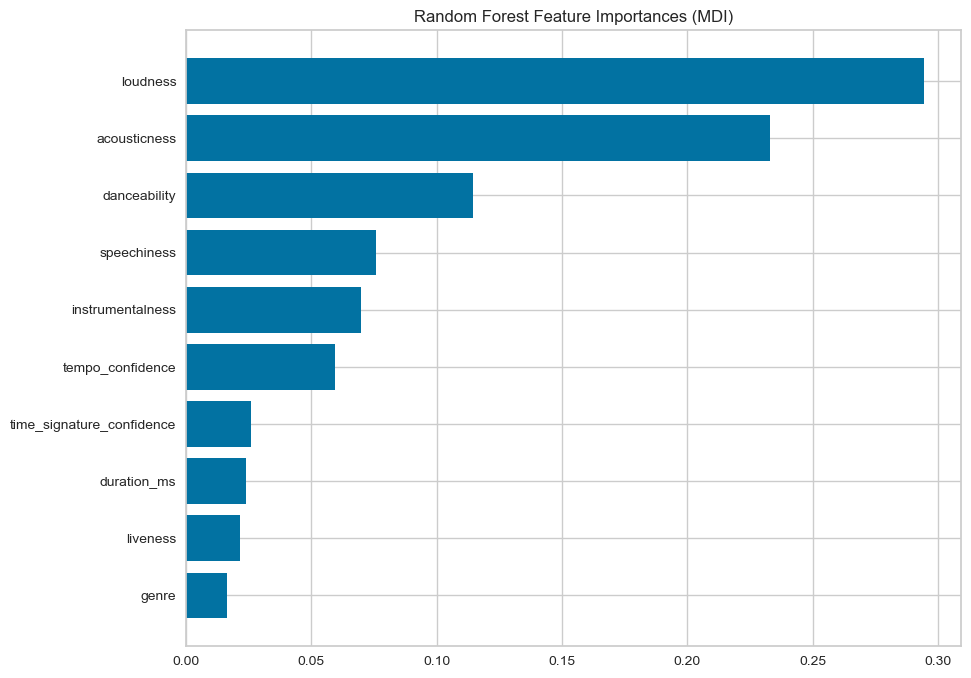

['genre' 'liveness' 'duration_ms' 'time_signature_confidence'
 'tempo_confidence' 'instrumentalness' 'speechiness' 'danceability'
 'acousticness' 'loudness']


In [75]:


nbr_features = 10

tree_feature_importances = rfc1.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
#fig, ax = plt.subplots()

plt.figure(figsize=(10, 8))
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()
print(np.array(attributes)[sorted_idx])

In [76]:
colonne_importanti = ['genre','liveness','duration_ms','time_signature_confidence',
 'tempo_confidence', 'instrumentalness', 'speechiness','danceability',
 'acousticness' ,'loudness']

In [77]:
import copy

df_ridotto = copy.deepcopy(df[colonne_importanti])
df_ridotto

,genre,liveness,duration_ms,time_signature_confidence,tempo_confidence,instrumentalness,speechiness,danceability,acousticness,loudness
0,0.007447,-0.889812,0.797420,0.787971,-1.417948,1.766613,1.938632,-0.186041,0.659428,-0.588997
1,0.007447,-0.530867,2.550119,-1.999208,0.765656,1.816690,-1.067093,1.063136,-0.469639,-1.142236
2,0.007447,-1.272670,0.543118,-1.946310,1.326491,1.718254,1.004903,1.355375,-0.879669,-0.764607
3,0.007447,-0.443037,1.592682,-1.916735,1.442640,1.836646,0.366106,0.633373,-0.822027,-1.010613
4,0.007447,-0.401379,0.385608,0.787971,1.442640,1.867806,-0.443351,1.126168,0.558406,-1.234849
...,...,...,...,...,...,...,...,...,...,...
87945,0.003343,1.111459,-0.061779,0.787971,0.934902,1.534564,0.608776,-0.564232,-0.940847,1.637100
87946,0.003343,-1.018318,-0.110350,0.787971,0.878487,-0.616040,-1.645092,0.581802,0.136492,0.936856
87947,0.003343,-0.200804,-0.235874,0.634326,1.216979,-0.605343,-0.122951,1.424137,-0.736753,0.749566
87948,0.003343,-2.392504,-0.073532,0.787971,0.672737,-0.616016,-0.592442,0.507310,0.139463,1.449257


In [78]:
x_ridotto = df_ridotto.values
x_ridotto.shape, y.shape

((87950, 10), (87950,))

In [79]:
from sklearn.model_selection import train_test_split

x_train_ridotto, x_test_ridotto, y_train, y_test = train_test_split(x_ridotto, y, test_size=0.2, random_state=42, stratify=y)
# Usando l'opzione stratify=y, garantisci che la suddivisione mantenga la stessa proporzione di classi tra set di addestramento e di test, utile quando hai un set di dati sbilanciato

x_train_ridotto.shape, x_test_ridotto.shape, y_train.shape, y_test.shape

((70360, 10), (17590, 10), (70360,), (17590,))

In [80]:
param_list = {'n_estimators': [50, 100, 150, 200],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
              'max_depth':list(np.arange(2, 10)),
              'criterion':['gini','entropy','log_loss'],
            'max_features': ['sqrt', 'log2']
             }

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_list, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train_ridotto, y_train)
random_search.best_params_

# I parametri migliori sono gli stessi del caso "intero"?

{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [81]:
#alleno il modello con i migliori parametri

rfc2 = random_search.best_estimator_
rfc2.fit(x_train_ridotto, y_train)

y_pred_rfc2 = rfc2.predict(x_test_ridotto)

print('Accuracy %s' % accuracy_score(y_test, y_pred_rfc2))
print('F1-score %s' % f1_score(y_test, y_pred_rfc2, average='weighted'))
print(classification_report(y_test, y_pred_rfc2, target_names= mapping))

# Con solamente 15 feature si  ottiene una accuracy di 0.415, invece di 0.4375 come il caso "intero" 

Accuracy 0.44906196702671974
F1-score 0.4143046073132285
              precision    recall  f1-score   support

       angry       0.59      0.53      0.56      1970
       bored       0.52      0.28      0.36      1429
        calm       0.37      0.75      0.49      3683
     excited       0.45      0.45      0.45      2662
       happy       0.45      0.46      0.45      2350
     nervous       0.49      0.15      0.23      1415
    peaceful       1.00      0.04      0.09        90
     pleased       0.46      0.12      0.19      1768
     relaxed       0.73      0.01      0.03       627
         sad       0.67      0.79      0.73      1185
      sleepy       0.53      0.06      0.11       411

    accuracy                           0.45     17590
   macro avg       0.57      0.33      0.33     17590
weighted avg       0.49      0.45      0.41     17590



In [82]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, rfc2.predict(x_train_ridotto))
test_accuracy = accuracy_score(y_test, y_pred_rfc2)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.4743746446844798
Accuratezza sul set di test: 0.44906196702671974


In [83]:
# Vado a plottare l'accuracy dei due modelli al variare del numero di stimatori, che fino ad adesso è stato mantenuto di default = 100 
# Mentre gli altri parametri li lasciamo come trovati nelle search

max_k= 200
min= 5
step = 5
acc_intero = []
acc_ridotto = []

for k in range(min, max_k + 1, step):
    rfc1 = RandomForestClassifier(n_estimators = k, criterion='gini',min_samples_leaf=5, min_samples_split=20, max_depth=8, max_features= 'log2', n_jobs=-1)
    rfc2 = RandomForestClassifier(n_estimators = k, criterion='gini',min_samples_leaf=5, min_samples_split=20, max_depth=8, max_features= 'log2', n_jobs=-1)
    rfc1.fit(X_train, y_train)
    rfc2.fit(x_train_ridotto,y_train)
    
    y_pred_rfc1 = rfc1.predict(X_test)
    y_pred_rfc2 = rfc2.predict(x_test_ridotto)

    acc_intero.append(accuracy_score(y_test, y_pred_rfc1))
    acc_ridotto.append(accuracy_score(y_test, y_pred_rfc2))

    print(f'{k}th fit done')


5th fit done
10th fit done
15th fit done
20th fit done
25th fit done
30th fit done
35th fit done
40th fit done
45th fit done
50th fit done
55th fit done
60th fit done
65th fit done
70th fit done
75th fit done
80th fit done
85th fit done
90th fit done
95th fit done
100th fit done
105th fit done
110th fit done
115th fit done
120th fit done
125th fit done
130th fit done
135th fit done
140th fit done
145th fit done
150th fit done
155th fit done
160th fit done
165th fit done
170th fit done
175th fit done
180th fit done
185th fit done
190th fit done
195th fit done
200th fit done


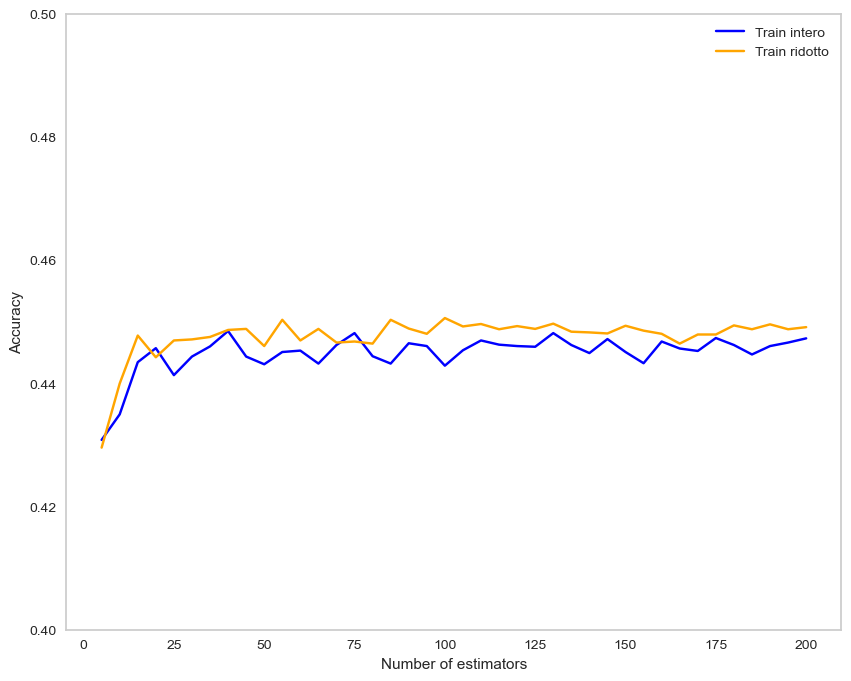

In [85]:
k_values = list(range(min, max_k+1, step))

plt.figure(figsize=(10, 8))

# Plotting
plt.plot(k_values, acc_intero, label='Train intero', color='blue')
plt.plot(k_values, acc_ridotto, label='Train ridotto', color='orange')

# Adding labels and title
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.grid(False)
# Adding a legend
plt.legend()

plt.ylim(0.4, 0.5)  # Replace 0 and 1 with your desired y-axis range

# Display the plot
plt.show()

In [86]:
#Prova bilanciamento

from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [87]:
df['emotion'].value_counts()

emotion
2     18414
3     13309
4     11751
0      9847
7      8842
1      7145
5      7077
9      5924
8      3136
10     2055
6       450
Name: count, dtype: int64

In [88]:
# Utilizza SMOTETomek per bilanciare le classi

# Define SMOTE-Tomek Links
#resample= SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({6: 14731, 10: 14727, 8: 14725, 9: 14716, 1: 14671, 5: 14624, 7: 14526, 0: 14519, 4: 14363, 3: 14236, 2: 14079})


In [89]:
# Addestra un classificatore RandomForest sui dati bilanciati

param_list = {'n_estimators': [30, 50, 100, 150, 200],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
              'max_depth':list(np.arange(2, 10)),
              'criterion':['gini','entropy','log_loss'],
            'max_features': ['sqrt', 'log2']
             }

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_list, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_res, y_res)
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'log_loss'}

In [90]:
#alleno il modello con i migliori parametri

rfc3 = random_search.best_estimator_
rfc3.fit(X_res, y_res)

y_pred_rfc3 = rfc3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_rfc3))
print('F1-score %s' % f1_score(y_test, y_pred_rfc3, average='weighted'))
print(classification_report(y_test, y_pred_rfc3, target_names= mapping))

Accuracy 0.402671972711768
F1-score 0.3753325014142095
              precision    recall  f1-score   support

       angry       0.52      0.67      0.59      1970
       bored       0.41      0.53      0.46      1429
        calm       0.56      0.06      0.10      3683
     excited       0.50      0.28      0.36      2662
       happy       0.41      0.53      0.46      2350
     nervous       0.31      0.48      0.38      1415
    peaceful       0.14      0.66      0.23        90
     pleased       0.31      0.42      0.36      1768
     relaxed       0.21      0.54      0.31       627
         sad       0.75      0.69      0.71      1185
      sleepy       0.26      0.45      0.33       411

    accuracy                           0.40     17590
   macro avg       0.40      0.48      0.39     17590
weighted avg       0.46      0.40      0.38     17590



In [91]:
#1 
train_accuracy = rfc3.score(X_res, y_res)
test_accuracy = rfc3.score(X_test, y_test)

print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)


train_accuracy = accuracy_score(y_res, rfc3.predict(X_res))
test_accuracy = accuracy_score(y_test, y_pred_rfc3)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.5688701013650831
Accuratezza sul set di test: 0.402671972711768
Accuratezza sul set di addestramento: 0.5688701013650831
Accuratezza sul set di test: 0.402671972711768


# Boosting

In [13]:
from sklearn.ensemble import AdaBoostClassifier

Cosa vado a fare: <br>
- Confrontare quello che fa il modello base (che usa i decision stump come base classifiers) e fare hyperparameter tuning su questi
- con quello che fa il modello se metto come base classifier RandomForest -> si riesce ad ottenere un modello più robusto, che migliora le prestazioni?
- Andare ad analizzare in qualche modo la feature importance dei due modelli - printarla e vedere se c'è qualcosa di interessante

In [93]:
#If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.
abc1 = AdaBoostClassifier(estimator=None)

In [94]:
#quanti min 

param_list = {'n_estimators': [50,75,100,125],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
              'algorithm': ['SAMME', 'SAMME.R']
             }

random_search = RandomizedSearchCV(abc1, param_distributions=param_list, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_params_

{'n_estimators': 75, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}

In [95]:
abc1 = random_search.best_estimator_
abc1.fit(X_train, y_train)

y_pred_abc1 = abc1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_abc1))
print('F1-score %s' % f1_score(y_test, y_pred_abc1, average='weighted'))
print(classification_report(y_test, y_pred_abc1, target_names= mapping))

Accuracy 0.39891984081864695
F1-score 0.3645637395752095
              precision    recall  f1-score   support

       angry       0.62      0.26      0.36      1970
       bored       0.46      0.22      0.30      1429
        calm       0.36      0.64      0.46      3683
     excited       0.37      0.61      0.46      2662
       happy       0.38      0.30      0.34      2350
     nervous       0.32      0.13      0.19      1415
    peaceful       0.17      0.16      0.16        90
     pleased       0.35      0.10      0.15      1768
     relaxed       0.39      0.12      0.18       627
         sad       0.58      0.84      0.69      1185
      sleepy       0.31      0.13      0.19       411

    accuracy                           0.40     17590
   macro avg       0.39      0.32      0.32     17590
weighted avg       0.41      0.40      0.36     17590



In [96]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, abc1.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_abc1)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.40130756111426946
Accuratezza sul set di test: 0.39891984081864695


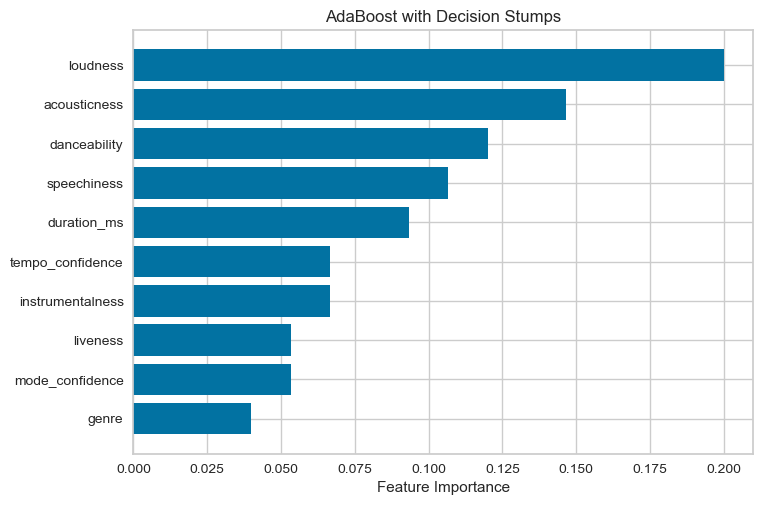

['genre' 'mode_confidence' 'liveness' 'instrumentalness'
 'tempo_confidence' 'duration_ms' 'speechiness' 'danceability'
 'acousticness' 'loudness']


In [97]:
nbr_features = 10

feature_importances_abc1 = abc1.feature_importances_
sorted_idx = feature_importances_abc1.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, feature_importances_abc1[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("AdaBoost with Decision Stumps")
plt.xlabel('Feature Importance')
plt.show()
print(np.array(attributes)[sorted_idx]) 

adaboost with RF

In [15]:
# # 2- Create an instance of RandomForestClassifier and  Use it as the base estimator for AdaBoostClassifier
# rf = RandomForestClassifier(n_estimators=50, criterion='gini',min_samples_leaf=5, min_samples_split=20, max_depth=8, max_features= 'log2')

# abc2 = AdaBoostClassifier(estimator= rf) #prova manualmente

In [16]:
# # piu di 300 min???????

# param_list = {'n_estimators': [50, 75, 100, 125],
#               'learning_rate': [0.01, 0.1, 0.3, 0,5],
#               'algorithm': ['SAMME.R']
#              }

# random_search = RandomizedSearchCV(abc2, param_distributions=param_list, n_iter=10, cv=5, random_state=42, n_jobs=-1)
# random_search.fit(X_train, y_train)
# print(random_search.best_params_)

In [ ]:
# #Alleno con i parametri migliori
# abc2 = random_search.best_estimator_
# abc2.fit(X_train, y_train)

# y_pred_abc2 = abc2.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred_abc2))
# print('F1-score %s' % f1_score(y_test, y_pred_abc2, average='weighted'))
# print(classification_report(y_test, y_pred_abc2))

In [ ]:
# train_accuracy = accuracy_score(y_train, abc2.predict(X_train))
# test_accuracy = accuracy_score(y_test, y_pred_abc2)
# print("Accuratezza sul set di addestramento:", train_accuracy)
# print("Accuratezza sul set di test:", test_accuracy)

In [18]:
# 6 min 

rf = RandomForestClassifier(n_estimators=50, criterion='gini',min_samples_leaf=5, min_samples_split=20, max_depth=8, max_features= 'log2', n_jobs=-1)

abc2 = AdaBoostClassifier(estimator= rf, n_estimators= 30, learning_rate= 0.3 , algorithm= 'SAMME.R', random_state=42)

abc2.fit(X_train, y_train)

y_pred_abc2 = abc2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_abc2))
print('F1-score %s' % f1_score(y_test, y_pred_abc2, average='weighted'))
print(classification_report(y_test, y_pred_abc2, target_names=mapping))


Accuracy 0.48988061398521887
F1-score 0.4788198567964823
              precision    recall  f1-score   support

       angry       0.64      0.49      0.56      1970
       bored       0.55      0.38      0.45      1429
        calm       0.41      0.72      0.52      3683
     excited       0.46      0.49      0.48      2662
       happy       0.49      0.46      0.47      2350
     nervous       0.46      0.30      0.36      1415
    peaceful       0.67      0.04      0.08        90
     pleased       0.51      0.28      0.36      1768
     relaxed       0.60      0.23      0.34       627
         sad       0.74      0.78      0.76      1185
      sleepy       0.46      0.23      0.31       411

    accuracy                           0.49     17590
   macro avg       0.54      0.40      0.43     17590
weighted avg       0.51      0.49      0.48     17590



In [19]:
train_accuracy = accuracy_score(y_train, abc2.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_abc2)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.5493462194428652
Accuratezza sul set di test: 0.48988061398521887


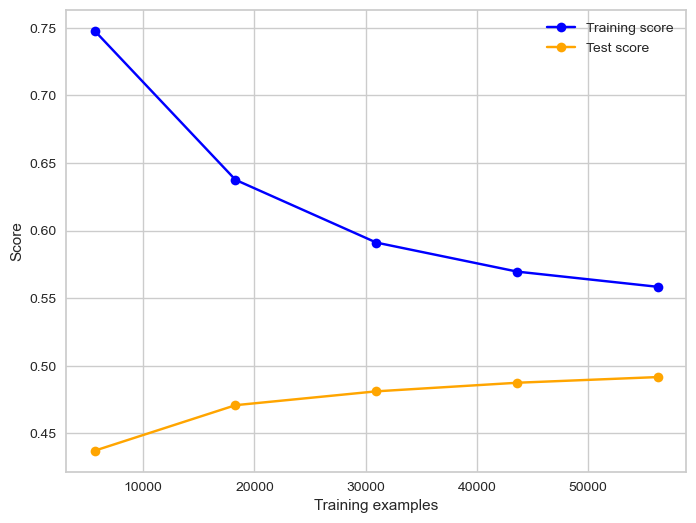

In [20]:
# Disegna le curve di apprendimento per valutare le prestazioni del modello al variare della dimensione 
# del set di addestramento e confronta le prestazioni sul set di addestramento e di test.

from sklearn.model_selection import learning_curve

plt.figure(figsize=(8, 6))  # Modifica le dimensioni come desiderato (larghezza, altezza)
train_sizes, train_scores, test_scores = learning_curve(abc2, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color = 'blue')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Test score', color= 'orange')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.model_selection import validation_curve

plt.figure(figsize=(8, 6))
param_range = [1, 5, 10, 20, 50, 100]  # Esempio di parametri da esplorare
train_scores, test_scores = validation_curve(abc2, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, 'o-', label='Training score', color = 'blue')
plt.plot(param_range, test_scores_mean, 'o-', label='Test score', color = 'orange')
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

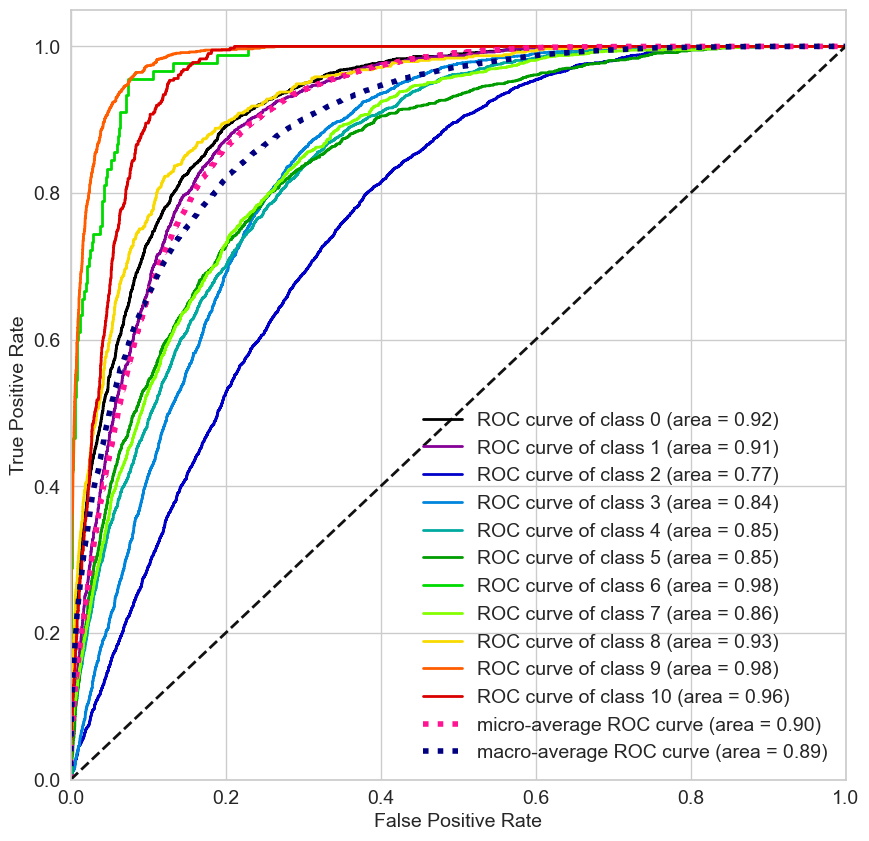

In [24]:
#vedi il migliore e plotto 


# Del migliore adaboost, che quindi (ovviamente) è quello con Random Forest come modello, vado a plottare anche le ROC e la confusion matrix
y_score_abc= abc2.predict_proba(X_test)
plot_roc(y_test, y_score_abc, figsize=(10,10), title_fontsize=15, text_fontsize=14)
plt.title("")
plt.show()

array([[ 962,    5,  141,  657,   74,  122,    0,    2,    0,    7,    0],
       [   2,  548,  678,    1,    2,   80,    0,    6,    1,  105,    6],
       [  29,  206, 2644,  163,  252,  168,    1,  132,   36,   35,   17],
       [ 351,    0,  363, 1307,  515,   79,    0,   46,    1,    0,    0],
       [  70,    1,  429,  555, 1073,   21,    0,  199,    2,    0,    0],
       [  72,   75,  680,  108,   39,  424,    0,   14,    1,    2,    0],
       [   0,    2,   19,    0,    0,    0,    4,    0,   13,   15,   37],
       [   5,    7,  952,   41,  234,   16,    0,  488,   23,    2,    0],
       [   1,   15,  377,    3,    2,    1,    0,   62,  146,    8,   12],
       [   2,  115,   98,    0,    0,    2,    0,    0,    3,  926,   39],
       [   0,   28,  113,    0,    0,    0,    1,    0,   18,  156,   95]],
      dtype=int64)

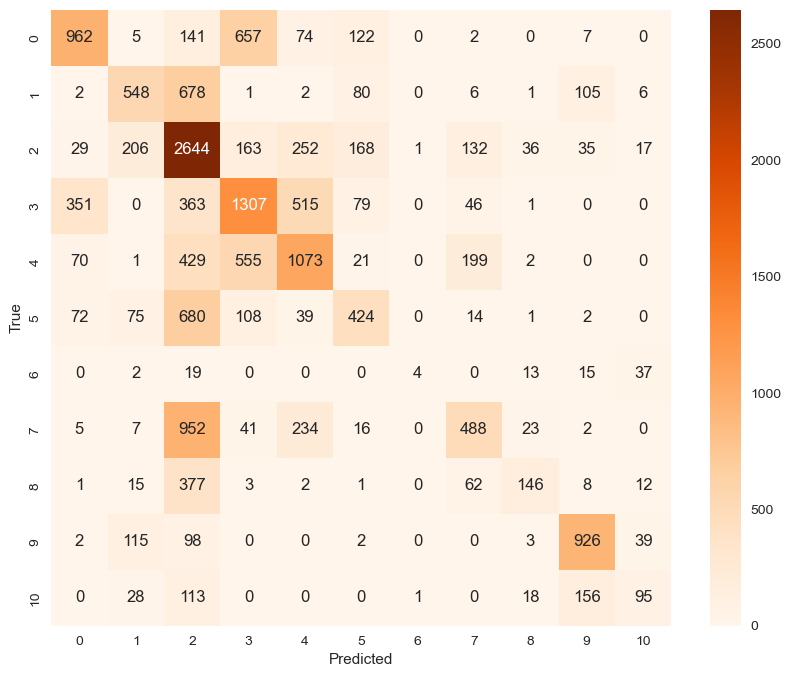

In [25]:
cm_abc = confusion_matrix(y_test, y_pred_abc2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_abc, annot=True, fmt='d', cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('True')
cm_abc


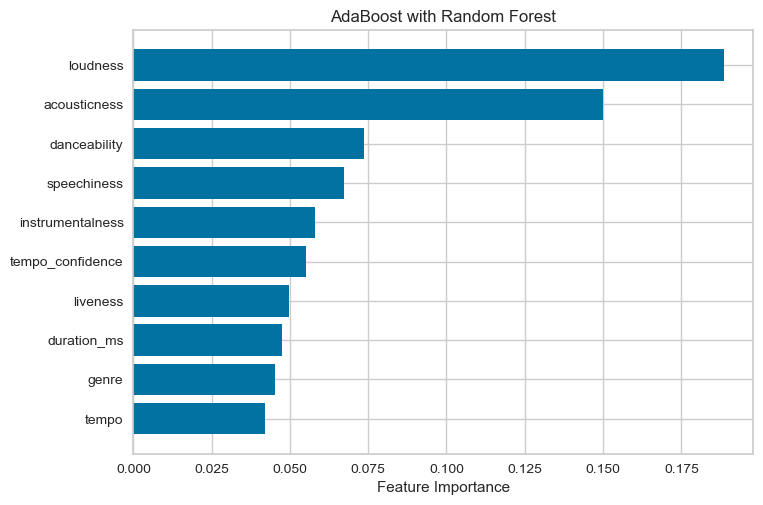

['tempo' 'genre' 'duration_ms' 'liveness' 'tempo_confidence'
 'instrumentalness' 'speechiness' 'danceability' 'acousticness' 'loudness']


In [27]:
nbr_features = 10

feature_importances_abc2 = abc2.feature_importances_
sorted_idx2 = feature_importances_abc2.argsort()[-nbr_features:]


y_ticks2 = np.arange(0, len(sorted_idx2))
fig, ax = plt.subplots()
plt.barh(y_ticks2, feature_importances_abc2[sorted_idx2])
plt.yticks(y_ticks2, np.array(df.columns)[sorted_idx2])
plt.title("AdaBoost with Random Forest")
plt.xlabel('Feature Importance')
plt.show()
print(np.array(df.columns)[sorted_idx2])

In [ ]:
['genre' 'mode_confidence' 'liveness' 'instrumentalness'
 'tempo_confidence' 'duration_ms' 'speechiness' 'danceability'
 'acousticness' 'loudness']

In [ ]:
important_feat_abc1=list(np.array(df.columns)[sorted_idx])
important_feat_abc2=list(np.array(df.columns)[sorted_idx2])

In [ ]:
elementi_comuni = list(set(important_feat_abc2) & set(important_feat_abc1))
elementi_comuni

## gradient boosting e variazioni(xgboost - light - cat)


Gradient Boosting è una tecnica di ensemble learning che costruisce un modello predittivo complesso combinando insieme molteplici modelli più semplici, di solito chiamati weak learners. In questo contesto, un weak learner è un modello che ha prestazioni leggermente migliori di un modello casuale.

La tecnica di Gradient Boosting costruisce iterativamente i weak learners in modo sequenziale, enfatizzando gli errori commessi dai modelli precedenti. Ogni nuovo modello è addestrato per correggere gli errori del modello precedente. Questo viene fatto minimizzando una funzione di perdita, tipicamente attraverso gradient descent.

Ora, riguardo ai parametri usati nell'esempio di codice fornito:

n_estimators: Il numero di weak learners (alberi decisionali nel caso di Gradient Boosting) che vengono combinati. Un valore più alto potrebbe portare a un modello più complesso, ma bisogna fare attenzione a non incorrere in overfitting.

learning_rate: Il tasso di apprendimento controlla quanto ogni modello contribuisce alla correzione degli errori dei modelli precedenti. Valori più bassi rendono il modello più robusto, ma richiedono un maggior numero di weak learners.

max_depth: La massima profondità di ogni albero decisionale. Un valore più alto potrebbe portare a un modello più complesso, ma anche a un maggiore rischio di overfitting.

min_samples_split: Il numero minimo di campioni richiesti per suddividere un nodo interno dell'albero.

min_samples_leaf: Il numero minimo di campioni richiesti in una foglia dell'albero.

subsample: La frazione dei campioni da utilizzare per l'addestramento di ciascun albero. Valori più bassi possono aiutare a prevenire l'overfitting.

# Gradient Boosting

# XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [14]:
# !pip install xgboost

In [15]:
from xgboost import XGBClassifier

In [32]:
# Inizializzo il classificatore
xgb = XGBClassifier()

In [33]:
param_list = {# 'objective': ['binary:logistic'], 
            'n_estimators': [50, 75, 100, 150],
              'learning_rate': [ 0.01, 0.05,  0.1],
              'gamma': [0.0, 0.1, 0.2],
              'reg_lambda': [0.0, 0.5, 1.0], #L2 regularization
              'reg_alpha': [0.0, 0.5, 1.0], #L1 regularization
              'tree_method':['exact','approx'],
              'booster':['gbtree','gblinear'],
              'max_depth': [3, 5, 7, 9],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0]
             }
                    
random_search = RandomizedSearchCV(xgb, param_distributions=param_list, n_iter= 10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'tree_method': 'exact', 'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 1.0, 'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0.0, 'colsample_bytree': 0.6, 'booster': 'gbtree'}


In [34]:
xgb = random_search.best_estimator_
random_search.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
#xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_xgb))
print('F1-score %s' % f1_score(y_test, y_pred_xgb, average=None))
print(classification_report(y_test, y_pred_xgb, target_names=mapping))

Accuracy 0.5025014212620807
F1-score [0.60373333 0.42395105 0.52977761 0.50391407 0.51717434 0.31429966
 0.34188034 0.29446309 0.27672956 0.75733545 0.26617375]
              precision    recall  f1-score   support

       angry       0.64      0.57      0.60      1970
       bored       0.56      0.34      0.42      1429
        calm       0.41      0.76      0.53      3683
     excited       0.49      0.52      0.50      2662
       happy       0.53      0.51      0.52      2350
     nervous       0.51      0.23      0.31      1415
    peaceful       0.74      0.22      0.34        90
     pleased       0.57      0.20      0.29      1768
     relaxed       0.65      0.18      0.28       627
         sad       0.71      0.81      0.76      1185
      sleepy       0.55      0.18      0.27       411

    accuracy                           0.50     17590
   macro avg       0.58      0.41      0.44     17590
weighted avg       0.53      0.50      0.48     17590



In [36]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.6256964184195566
Accuratezza sul set di test: 0.5025014212620807


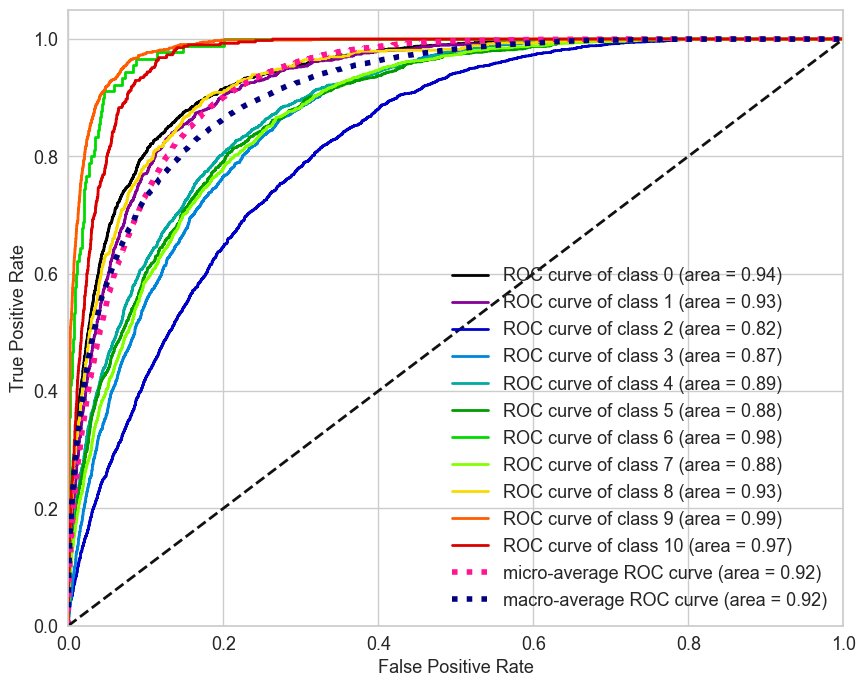

In [22]:
# Plotto la ROC e la confusion matrix, giusto per averle
y_score_xgb= xgb.predict_proba(X_test)
plot_roc(y_test, y_score_xgb, figsize=(10,8), title_fontsize=15, text_fontsize=13)
plt.title("")
plt.show()

array([[1196,    6,   75,  509,   71,  105,    0,    6,    0,    2,    0],
       [   4,  681,  470,    2,    3,  105,    0,   14,    8,  125,   17],
       [  68,  246, 2380,  203,  224,  186,    2,  207,   70,   60,   37],
       [ 420,    2,  253, 1356,  509,   72,    0,   49,    1,    0,    0],
       [  74,    1,  299,  545, 1221,   29,    0,  179,    2,    0,    0],
       [ 116,  115,  528,  109,   39,  487,    0,   18,    2,    1,    0],
       [   0,    0,   12,    0,    0,    0,   32,    0,   13,   12,   21],
       [   8,   15,  761,   59,  271,   21,    0,  571,   58,    2,    2],
       [   1,   18,  280,    2,    7,    2,    9,   77,  195,   11,   25],
       [   4,  102,   57,    0,    0,    2,    3,    0,    4,  947,   66],
       [   0,   22,   64,    0,    0,    0,   12,    0,   20,  160,  133]],
      dtype=int64)

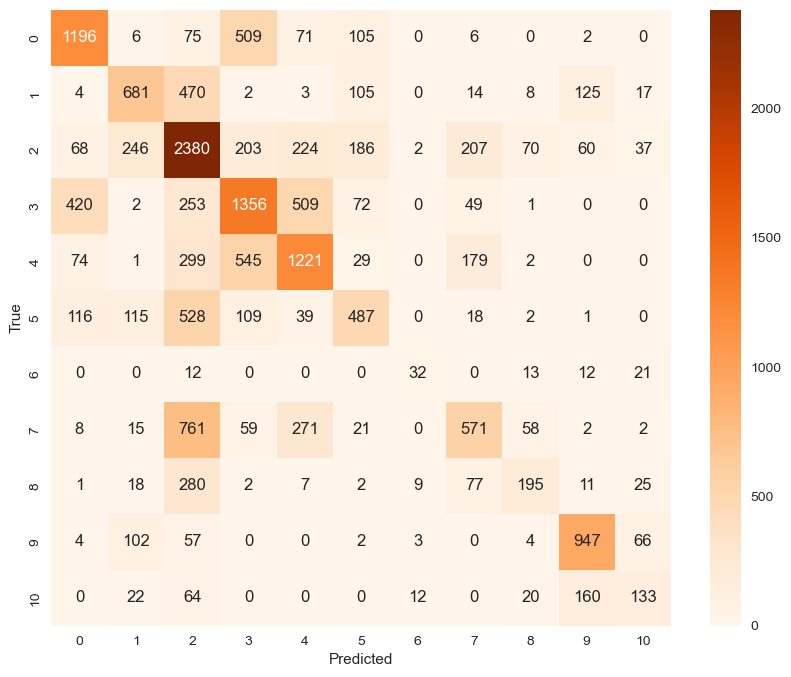

In [23]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('True')
cm_xgb

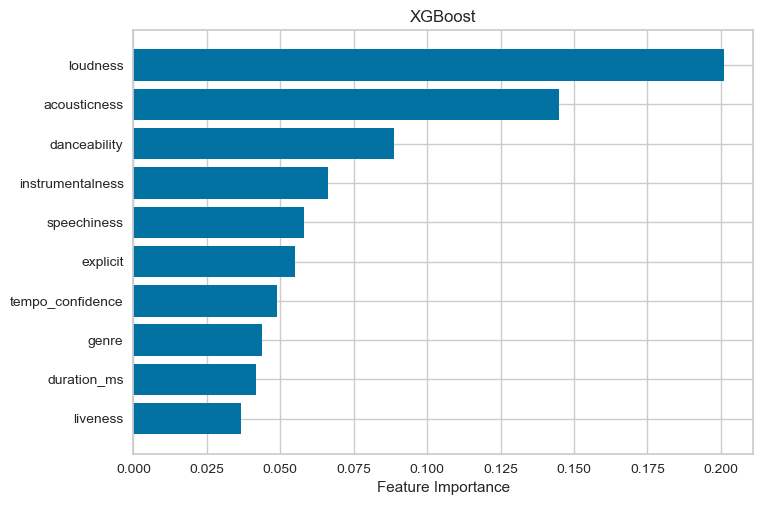

['liveness' 'duration_ms' 'genre' 'tempo_confidence' 'explicit'
 'speechiness' 'instrumentalness' 'danceability' 'acousticness' 'loudness']


In [24]:
#Prendiamo la feature importance delle prime 15 del modello migliore (XGBoost)
nbr_features = 10

feature_importances_xgb = xgb.feature_importances_
sorted_idx3 = feature_importances_xgb.argsort()[-nbr_features:]

y_ticks3 = np.arange(0, len(sorted_idx3))
fig, ax = plt.subplots()
plt.barh(y_ticks3, feature_importances_xgb[sorted_idx3])
plt.yticks(y_ticks3, np.array(df.columns)[sorted_idx3])
plt.title("XGBoost")
plt.xlabel('Feature Importance')
plt.show()
print(np.array(df.columns)[sorted_idx3])

In [25]:
for i in sorted_idx3:
    print(i, np.array(df.columns)[i],feature_importances_xgb[i] )

6 liveness 0.0367725
0 duration_ms 0.041724425
19 genre 0.04392754
8 tempo_confidence 0.04875083
15 explicit 0.05515821
3 speechiness 0.057922285
5 instrumentalness 0.066310994
1 danceability 0.08866099
4 acousticness 0.14493586
2 loudness 0.20099644


# LightGBM
https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

In [42]:
# !pip install lightgbm
# or use conda install -c conda-forge lightgbm

In [26]:
from lightgbm import LGBMClassifier

In [27]:
# Definisci il modello LGBMClassifier
lgbm = LGBMClassifier()

# Definisci la griglia dei parametri
param_grid = {
    'boosting_type': ['gbdt', 'goss'], #dart
    'n_estimators': [10, 20, 30, 50, 100, 200], #200
    'learning_rate': [0.001, 0.01, 0.05, 0.1], 
    'max_depth': [3, 5, 7, 9],         #  [-1]   [3, 5, 7, 9 ]
    'subsample_for_bin': [200000],
    'objective': ['multiclass'],
    'min_data_in_leaf':  [100,200,300,1000,2000],
    'num_leaves': [15, 31, 63], 

    'reg_alpha': [0.0, 0.1, 0.3, 0.5],    #L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.3, 0.5]    #L2 regularization term on weights
}

# Crea l'oggetto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_grid, n_iter= 10, cv= 5, random_state=42, n_jobs=-1)

# Esegui la ricerca casuale dei parametri
random_search.fit(X_train, y_train)

# Stampare i migliori parametri trovati
print(random_search.best_params_)

c:\Users\HUAWEI\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HUAWEI\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3806
[LightGBM] [Info] Number of data points in the train set: 70360, number of used features: 20
[LightGBM] [Info] Start training from score -2.189678
[LightGBM] [Info] Start training from score -2.510356
[LightGBM] [Info] Start training from score -1.563671
[LightGBM] [Info] Start training from score -1.888347
[LightGBM] [Info] Start training from score -2.012809
[LightGBM] [Info] Start training from score -2.519848
[LightGBM] [Info] Start training from score -5.275276
[LightGBM] [Info] Start training from score -2.297199
[LightGBM] [Info] Start tra

In [28]:
lgbm = random_search.best_estimator_

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names= mapping))

[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3806
[LightGBM] [Info] Number of data points in the train set: 70360, number of used features: 20
[LightGBM] [Info] Start training from score -2.189678
[LightGBM] [Info] Start training from score -2.510356
[LightGBM] [Info] Start training from score -1.563671
[LightGBM] [Info] Start training from score -1.888347
[LightGBM] [Info] Start training from score -2.012809
[LightGBM] [Info] Start training from score -2.519848
[LightGBM] [Info] Start training from score -5.275276
[LightGBM] [Info] Start training from score -2.297199
[LightGBM] [Info] Start tra

In [29]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, lgbm.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
Accuratezza sul set di addestramento: 0.5494172825469017
Accuratezza sul set di test: 0.5067652075042638


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

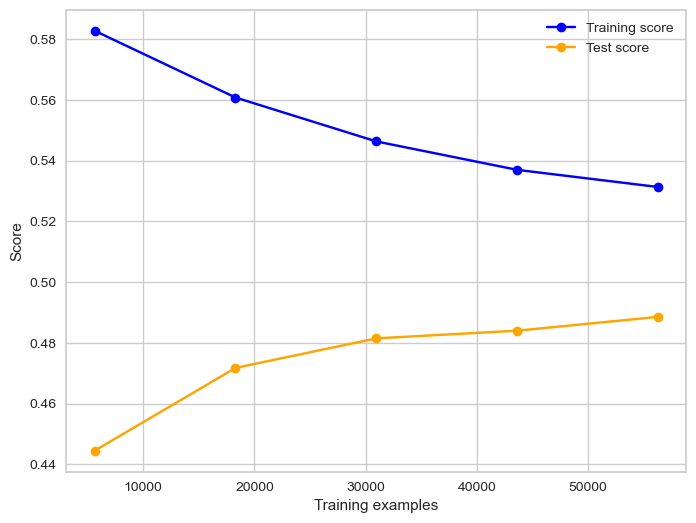

In [50]:
# Disegna le curve di apprendimento per valutare le prestazioni del modello al variare della dimensione 
# del set di addestramento e confronta le prestazioni sul set di addestramento e di test.

from sklearn.model_selection import learning_curve

plt.figure(figsize=(8, 6))  # Modifica le dimensioni come desiderato (larghezza, altezza)
train_sizes, train_scores, test_scores = learning_curve(lgbm, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color = 'blue')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Test score', color= 'orange')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000


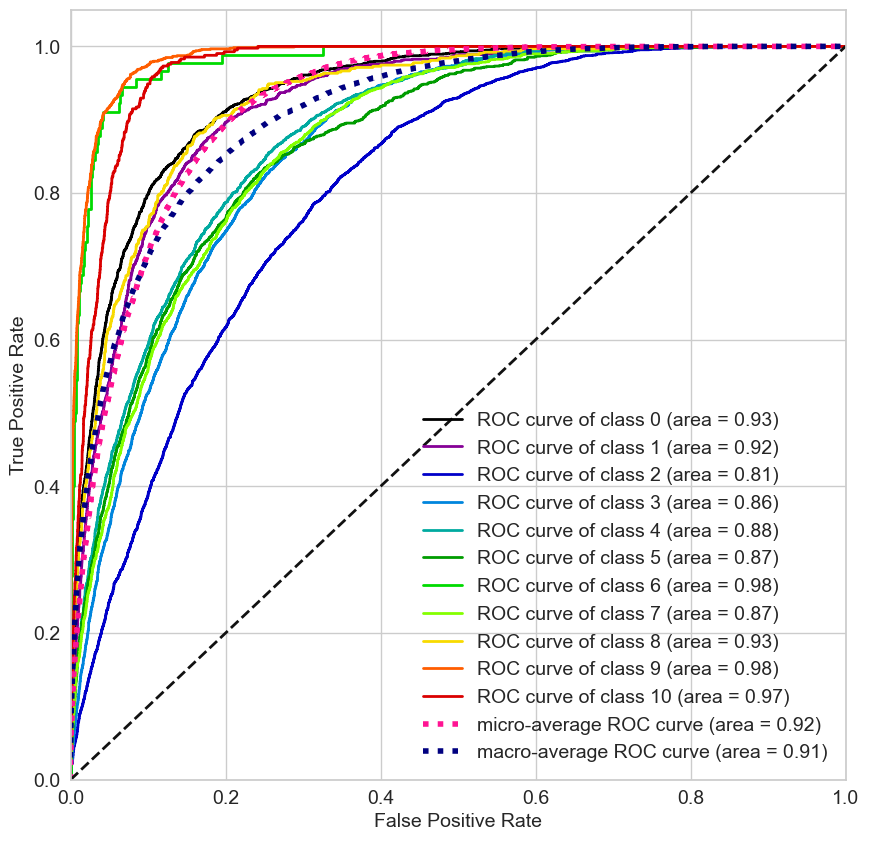

In [30]:
from scikitplot.metrics import plot_roc

y_score_lgbm = lgbm.predict_proba(X_test)
plot_roc(y_test, y_score_lgbm, figsize=(10,10), title_fontsize=15, text_fontsize=14)
plt.title("")
plt.show()

array([[1163,    6,   88,  521,   79,  104,    0,    4,    0,    5,    0],
       [   6,  628,  509,    1,    2,  108,    1,   12,    8,  134,   20],
       [  57,  246, 2337,  212,  252,  205,    2,  212,   64,   58,   38],
       [ 435,    1,  260, 1289,  545,   80,    0,   51,    1,    0,    0],
       [  70,    1,  317,  526, 1207,   26,    0,  200,    3,    0,    0],
       [ 129,  106,  554,  108,   48,  446,    0,   20,    1,    3,    0],
       [   0,    1,   13,    0,    0,    0,   27,    0,   16,   12,   21],
       [  10,   10,  796,   58,  263,   22,    0,  559,   47,    2,    1],
       [   2,   19,  297,    0,    7,    2,    7,   82,  175,   11,   25],
       [   3,  106,   52,    0,    0,    6,    2,    0,    4,  947,   65],
       [   0,   31,   59,    0,    0,    0,   11,    0,   20,  154,  136]],
      dtype=int64)

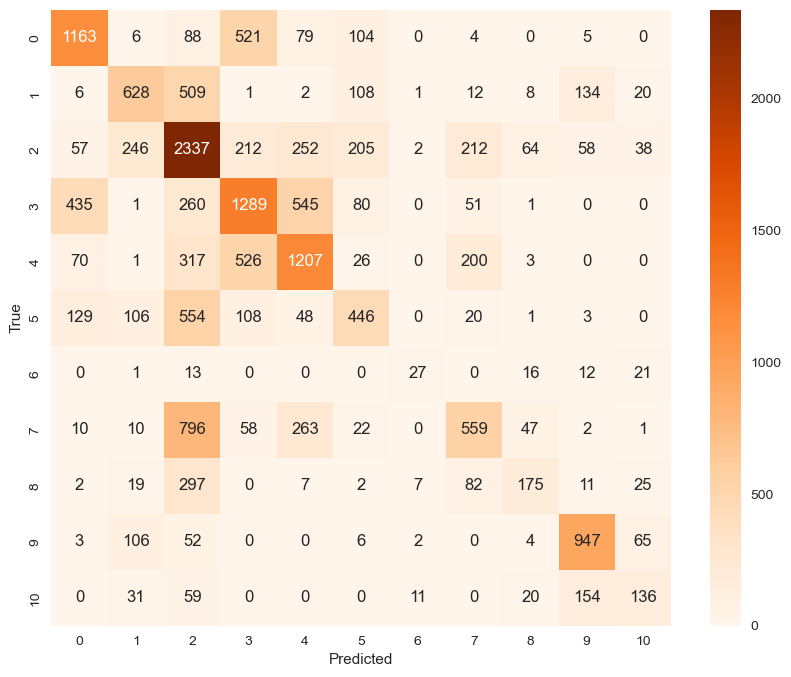

In [31]:
cm = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('True')
cm

[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


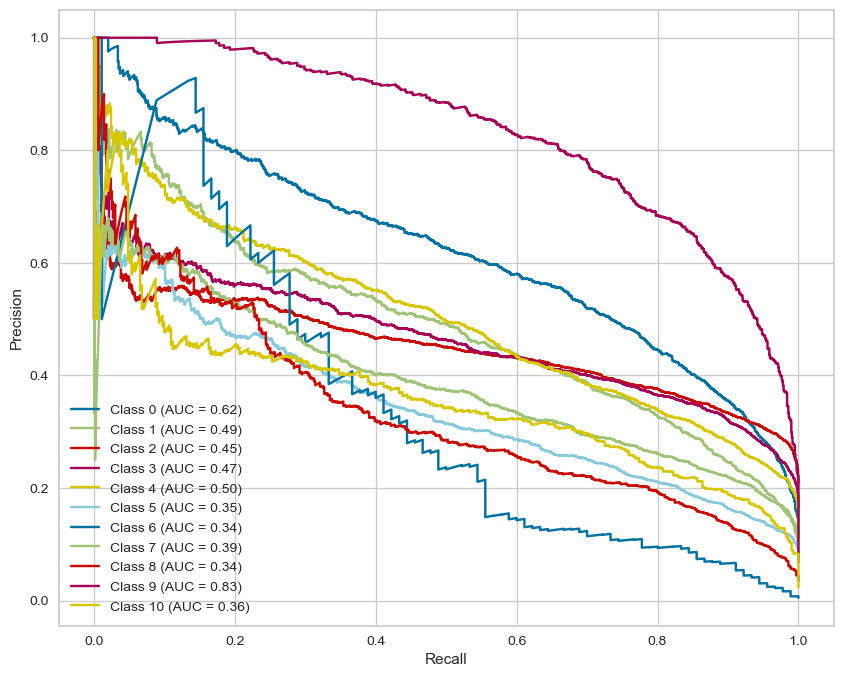

In [24]:
# Make predictions on test data
y_pred_proba = lgbm.predict_proba(X_test)  # Probability estimates of each class

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Compute precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()
auc_score = dict()

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend(loc='lower left')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

plot tutti e due


In [37]:
#Vado anche a plottare l'accuracy del modello rispetto al numero di stimatori
max_k= 200
acc_xgb = []
acc_lgb=[]

for k in range(20, max_k+1 ,5):
    xgb1 = XGBClassifier( n_estimators=k, objective='binary:logistic', reg_lambda=1.0, reg_alpha=1.0, max_depth=7, learning_rate=0.01, booster='gbtree', tree_method= 'exact', subsample= 0.8,colsample_bytree= 0.6 )
    lgb1 = LGBMClassifier(n_estimators=k, subsample_for_bin= 200000, reg_lambda=  0.5, reg_alpha= 0.0, objective= 'multiclass', num_leaves= 15, min_data_in_leaf= 2000, max_depth= 7, learning_rate= 0.05, boosting_type= 'gbdt')
    xgb1.fit(X_train, y_train)
    lgb1.fit(X_train,y_train)
    
    y_pred_xgb1 = xgb1.predict(X_test)
    y_pred_gbc1 = lgb1.predict(X_test)

    acc_xgb.append(accuracy_score(y_test, y_pred_xgb1))
    acc_lgb.append(accuracy_score(y_test, y_pred_gbc1))
    print(f'{k}th fit done')

[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3806
[LightGBM] [Info] Number of data points in the train set: 70360, number of used features: 20
[LightGBM] [Info] Start training from score -2.189678
[LightGBM] [Info] Start training from score -2.510356
[LightGBM] [Info] Start training from score -1.563671
[LightGBM] [Info] Start training from score -1.888347
[LightGBM] [Info] Start training from score -2.012809
[LightGBM] [Info] Start training from score -2.519848
[LightGBM] [Info] Start training from score -5.275276
[LightGBM] [Info] Start training from score -2.297199
[LightGBM] [Info] Start tra

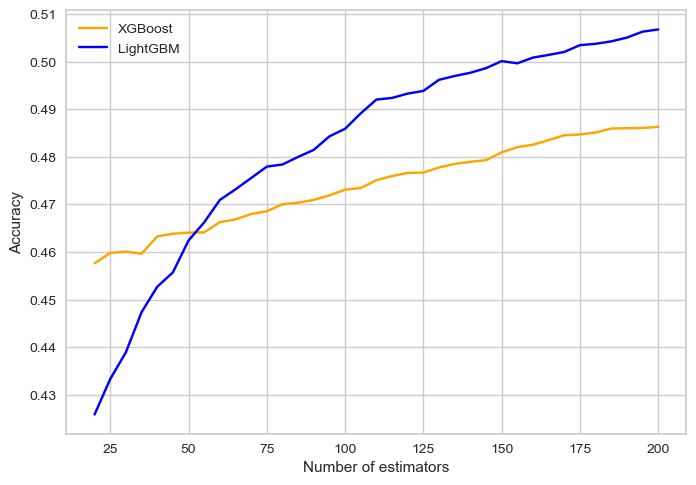

In [39]:
k_values = list(range(20, 201,5))

# Plotting
plt.plot(k_values, acc_xgb, label='XGBoost', color='orange')
plt.plot(k_values, acc_lgb, label='LightGBM', color='blue')


# Adding labels and title
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')

# Adding a legend
plt.legend()

#plt.ylim(0.48, 0.52)  # Replace 0 and 1 with your desired y-axis range

# Display the plot
plt.show()

## ultima prova bilanciamento

In [40]:
#Prova bilanciamento

from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [41]:
df['emotion'].value_counts()

emotion
2     18414
3     13309
4     11751
0      9847
7      8842
1      7145
5      7077
9      5924
8      3136
10     2055
6       450
Name: count, dtype: int64

In [42]:
# Utilizza SMOTETomek per bilanciare le classi

# Define SMOTE-Tomek Links
#resample= SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({6: 14731, 10: 14727, 8: 14725, 9: 14716, 1: 14671, 5: 14624, 7: 14526, 0: 14519, 4: 14363, 3: 14236, 2: 14079})


In [55]:
# Definisci il modello LGBMClassifier
lgbm = LGBMClassifier()

# Definisci la griglia dei parametri
param_grid = {
    'boosting_type': ['gbdt', 'goss'], #dart
    'n_estimators': [10, 20, 30, 50, 100, 200], #200
    'learning_rate': [0.001, 0.01, 0.05, 0.1], 
    'max_depth': [3, 5, 7, 9],         #  [-1]   [3, 5, 7, 9 ]
    'subsample_for_bin': [200000],
    'objective': ['multiclass'],
    'min_data_in_leaf':  [100,200,300,1000,2000],
    'num_leaves': [15, 31, 63], 

    'reg_alpha': [0.0, 0.1, 0.3, 0.5],    #L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.3, 0.5]    #L2 regularization term on weights
}

# Crea l'oggetto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_grid, n_iter= 10, cv= 5, random_state=42, n_jobs=-1)

# Esegui la ricerca casuale dei parametri
random_search.fit(X_res, y_res)

# Stampare i migliori parametri trovati
print(random_search.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 159917, number of used features: 20
[LightGBM] [Info] Start training from score -2.399197
[LightGBM] [Info] Start training from score -2.388782
[LightGBM] [Info] Start training from score -2.429971
[LightGBM] [Info] Start training from score -2.418881
[LightGBM] [Info] Start training from score -2.409999
[LightGBM] [Info] Start training from score -2.391991
[LightGBM] [Info] Start training from score -2.384701
[LightGBM] [Info] Start training from score -2.398715
[LightGBM] [Info] Start tr

In [56]:
lgbm = random_search.best_estimator_

lgbm.fit(X_res, y_res)

y_pred = lgbm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names= mapping))

[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 159917, number of used features: 20
[LightGBM] [Info] Start training from score -2.399197
[LightGBM] [Info] Start training from score -2.388782
[LightGBM] [Info] Start training from score -2.429971
[LightGBM] [Info] Start training from score -2.418881
[LightGBM] [Info] Start training from score -2.409999
[LightGBM] [Info] Start training from score -2.391991
[LightGBM] [Info] Start training from score -2.384701
[LightGBM] [Info] Start training from score -2.398715
[LightGBM] [Info] Start tr

In [58]:
#1 
train_accuracy = lgbm.score(X_res, y_res)
test_accuracy = lgbm.score(X_test, y_test)

print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)


train_accuracy = accuracy_score(y_res, lgbm.predict(X_res))
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
Accuratezza sul set di addestramento: 0.6351982590969065
Accuratezza sul set di test: 0.4722001137009665
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
Accuratezza sul set di addestramento: 0.6351982590969065
Accuratezza sul set di test: 0.4722001137009665
